#### Name - Wanshika W.A.R.
#### Index No. - 190663R
#### EN2550 Assignment 01 on Intensity Transformations and Neighborhood Filtering

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(01)

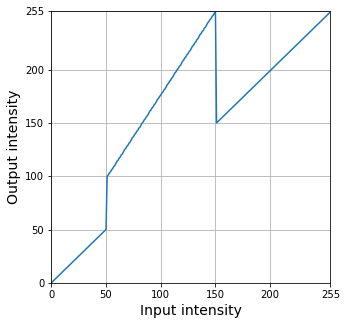

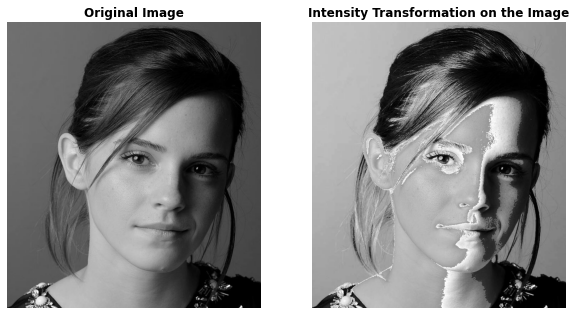

In [2]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\emma_gray.jpg")
assert im is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)
label = [0, 50, 100,150, 200,255]

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
plt.figure(figsize = (5,5))
plt.plot(t)
plt.grid('on')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xticks(label)
plt.yticks(label)
plt.xlabel('Input intensity', fontsize = 14)
plt.ylabel('Output intensity', fontsize = 14)

assert len(t) == 256
g = cv.LUT(im,t)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', g)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1,2,figsize = (10,10))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontweight ="bold",fontsize = 12)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].set_title('Intensity Transformation on the Image',fontweight ="bold",fontsize = 12)
ax[1].axis('off')

plt.show()

(02)

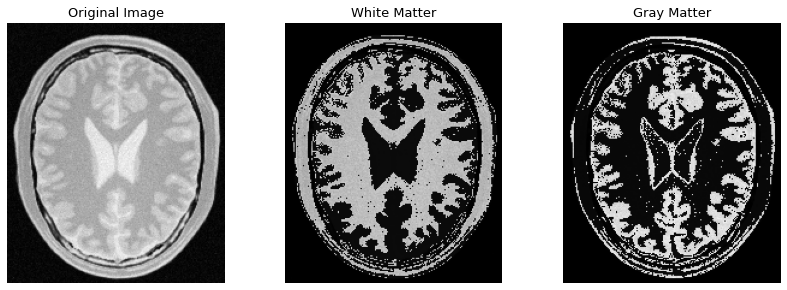

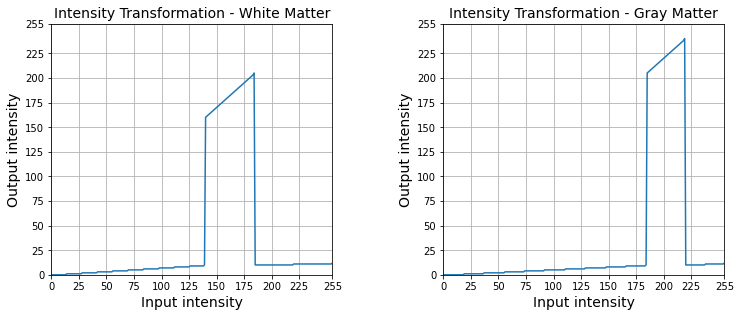

In [3]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert im is not None

t1 = np.linspace(0, 10, 140)
t2 = np.linspace(160, 205, 45)
t3 = np.linspace(10, 12, 71)

z1 = np.linspace(0, 10, 185)
z2 = np.linspace(205, 240, 35)
z3 = np.linspace(10, 12, 36)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
z = np.concatenate((z1, z2, z3), axis = 0).astype(np.uint8)

assert len(t) == 256
assert len(z) == 256
g = cv.LUT(im,t)
h = cv.LUT(im,z)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', g)
cv.waitKey(0)
cv.imshow('Image', h)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1,3,figsize = (12,12))
fig.tight_layout(pad =3.0)

ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 13)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].set_title('White Matter', fontsize = 13)
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB))
ax[2].set_title('Gray Matter', fontsize = 13)
ax[2].axis('off')

fig, ax = plt.subplots(1,2,figsize = (12,6 ))
fig.tight_layout(pad =8.0)

ax[0].plot(t)
ax[0].set_title('Intensity Transformation - White Matter', fontsize = 14)
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input intensity', fontsize = 14)
ax[0].set_ylabel('Output intensity', fontsize = 14)

ax[1].plot(z)
ax[1].set_title('Intensity Transformation - Gray Matter', fontsize = 14)
ax[1].grid('on')
ax[1].set_xlim([0, 255])
ax[1].set_ylim([0, 255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input intensity', fontsize = 14)
ax[1].set_ylabel('Output intensity', fontsize = 14)


plt.show()

(03) - (a)

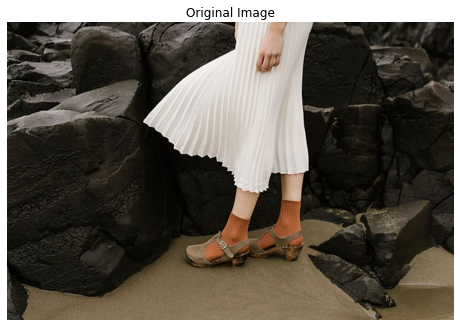

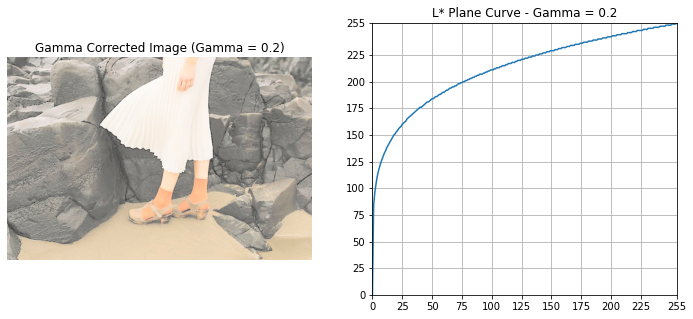

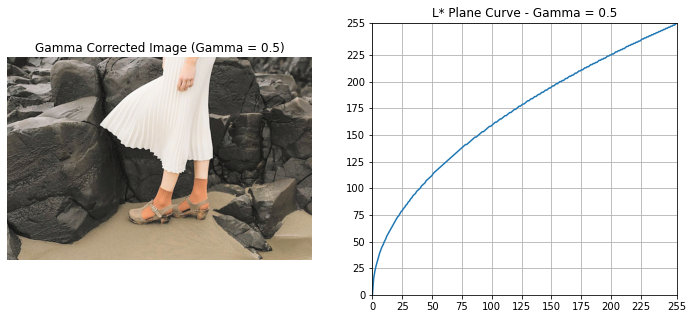

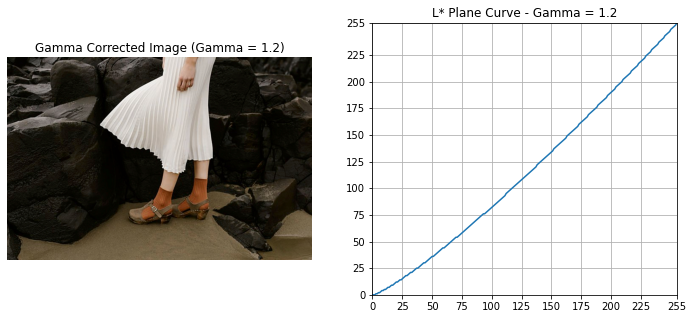

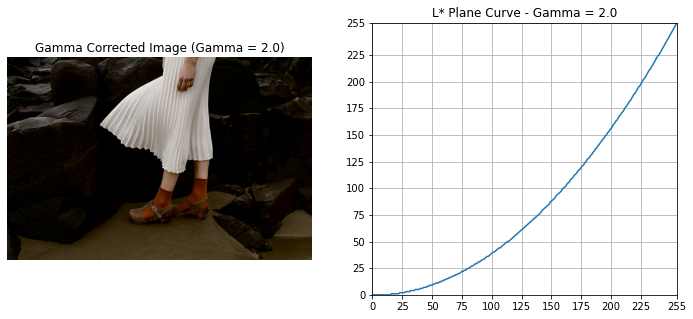

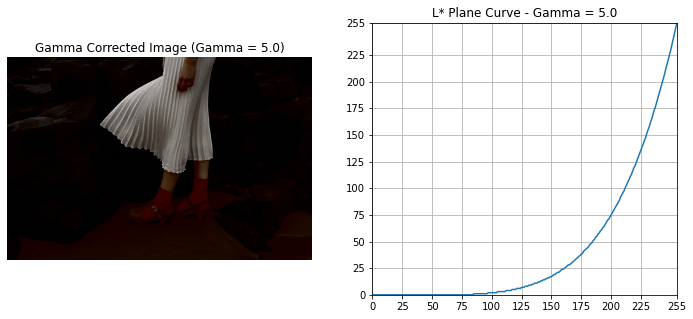

In [4]:
import math

im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\highlights_and_shadows.jpg")
assert im is not None

lab = cv.cvtColor(im, cv.COLOR_BGR2LAB)
cv.imshow('Image', im)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imshow('Image', lab)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax.set_title("Original Image")
ax.axis('off')

L, A, B = cv.split(lab)
##mid = 0.5
##mean = np.mean(L)
##gamma = math.log(mid*255)/math.log(mean)

gamma = [0.2, 0.5, 1.2, 2.0, 5.0]
hist_g = []

for j in gamma:
    lookUpTable = np.array([(p/255)**(j)*255 for p in range(0, 256)]).astype(np.uint8)

    L_G = cv.LUT(L, lookUpTable)

    ##print(gamma)
    ##print(L)
    ##print(L_G)

    lab_gamma = cv.merge([L_G, A, B])
    hist_g.append(cv.calcHist([lab_gamma], [0], None, [256], [0,256]))

    img = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)
            
    cv.imshow('Image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    ax[0].imshow(cv.cvtColor(img ,cv.COLOR_BGR2RGB))
    ax[0].set_title("Gamma Corrected Image (Gamma = " + str(j)+")")
    ax[0].axis('off')

    ax[1].plot(lookUpTable)
    ax[1].set_title("L* Plane Curve - Gamma = " + str(j))
    ax[1].set_xlim([0, 255])
    ax[1].set_ylim([0, 255])
    ax[1].set_xticks(label)
    ax[1].set_yticks(label)
    ax[1].grid("on")
    
    plt.show()

(03) - (b)

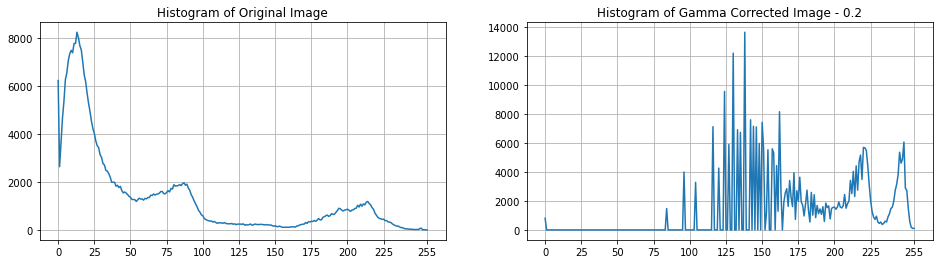

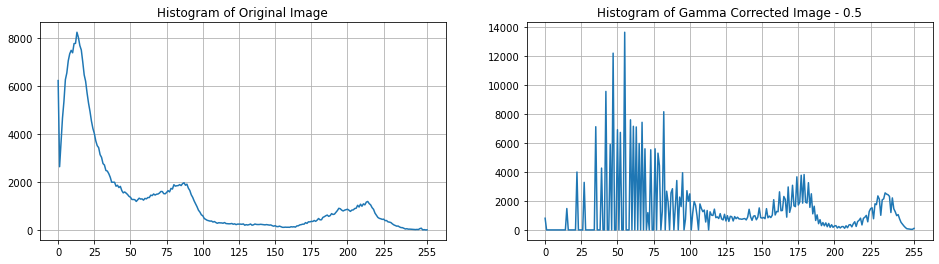

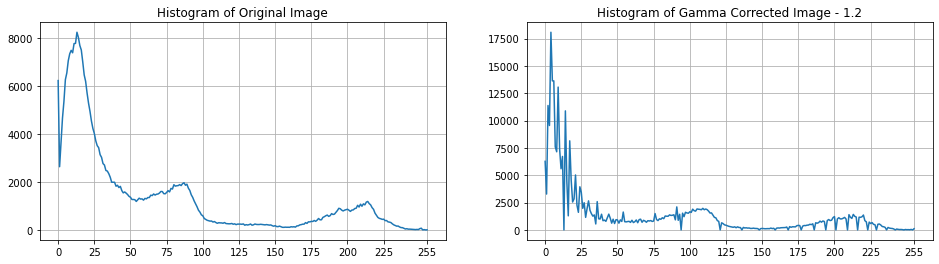

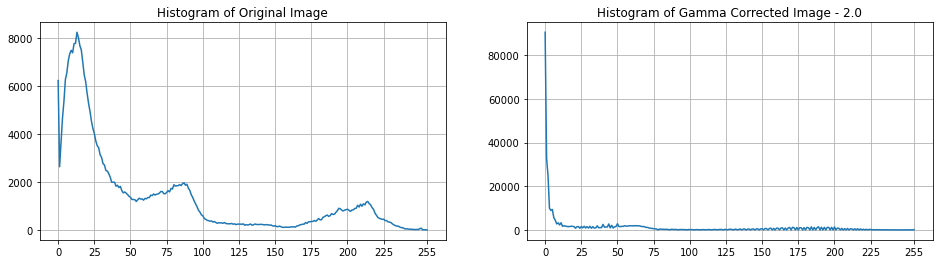

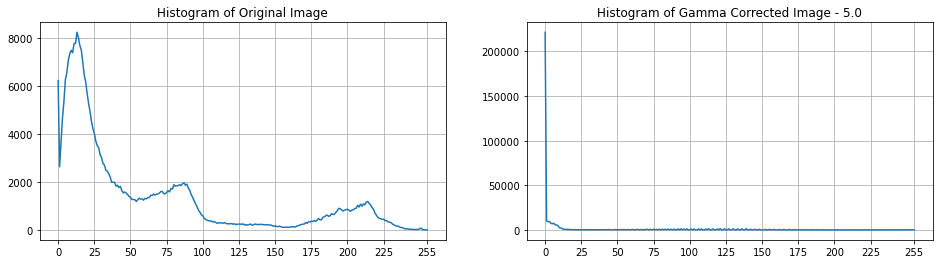

In [5]:
for k in range(len(hist_g)):
    hist_f = cv.calcHist([im], [0], None, [256], [0,256])

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].plot(hist_f)
    ax[0].set_title("Histogram of Original Image")
    ##ax[0].set_xlim([0, 256])
    ##ax[0].set_ylim([0, 10000])
    ax[0].set_xticks(label)
    ax[0].grid('on')

    ax[1].plot(hist_g[k])
    ax[1].set_title("Histogram of Gamma Corrected Image - " + str(gamma[k]))
    ##ax[1].set_xlim([0,256])
    ##ax[1].set_ylim([0, 40000])
    ax[1].set_xticks(label)
    ax[1].grid('on')

    plt.show()


(04)

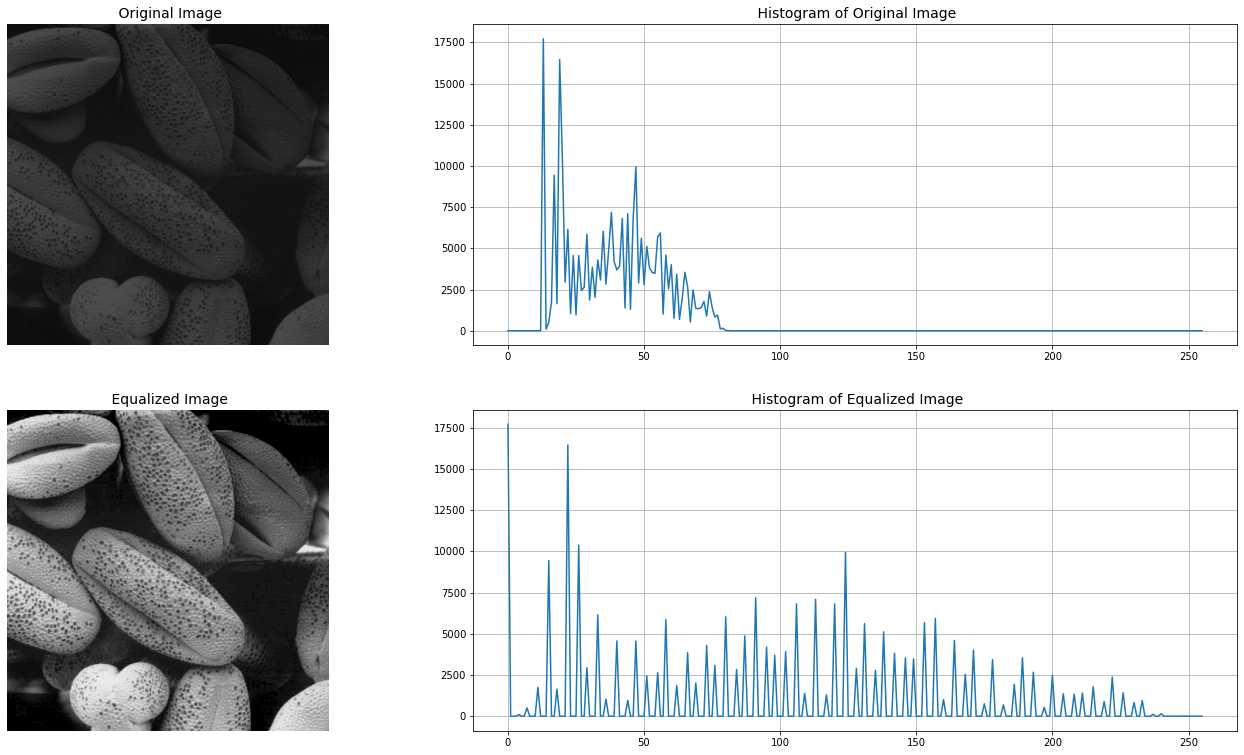

In [6]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\shells.png", cv.IMREAD_GRAYSCALE)
assert im is not None
ims = im.copy()

high = 0
low = 0

hist = np.zeros(256)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        for k in range(256):
            if im[i,j] == k:
                hist[k] += 1
                break
                
for i in range(0, 256, 1):
        if (hist[i] != 0):
            low = i
            break
    
for i in range(255, -1, -1):
    if (hist[i] != 0):
        high = i
        break

for i in range(ims.shape[0]):
    for j in range(ims.shape[1]):
        for k in range(high):
            if ims[i,j] == k:
                ims[i,j] = round((k-low)*((255-0)/(high-low)) + 0)
                break

hist_eq = np.zeros(256)
for i in range(ims.shape[0]):
    for j in range(ims.shape[1]):
        for k in range(256):
            if ims[i,j] == k:
                hist_eq[k] += 1
                break

cv.imshow('Image', ims)
cv.waitKey(0)
cv.destroyAllWindows()
    
fig, ax = plt.subplots(2, 2, figsize=(26, 13))
plt.subplots_adjust(wspace = -0.1, hspace = None)

ax[0,0].imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax[0,0].set_title(" Original Image", fontsize = 14)
ax[0,0].axis("off")

ax[0,1].plot(hist)
ax[0,1].set_title(" Histogram of Original Image", fontsize = 14)
ax[0,1].grid('on')

ax[1,0].imshow(cv.cvtColor(ims ,cv.COLOR_BGR2RGB))
ax[1,0].set_title(" Equalized Image", fontsize = 14)
ax[1,0].axis("off")

ax[1,1].plot(hist_eq )
ax[1,1].set_title(" Histogram of Equalized Image", fontsize = 14)
ax[1,1].grid('on')

plt.show()

(05) - (a)

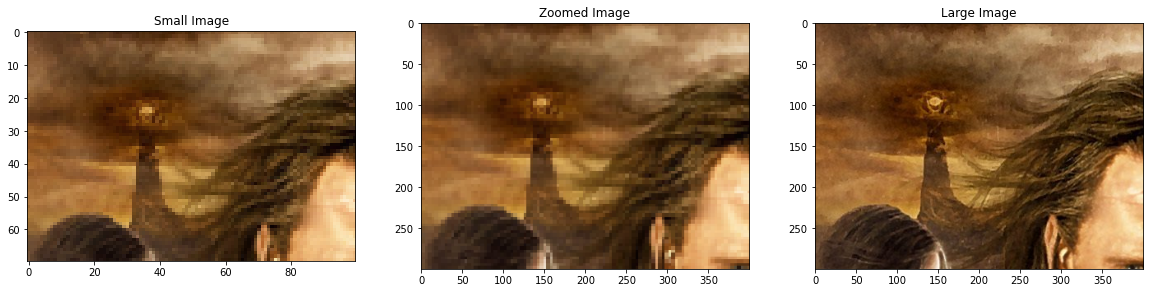

In [7]:
def nn_zoom(image, scaling_factor):
    s = scaling_factor
    img = image

    row = img.shape[0] * s
    column = img.shape[1] * s
    zoomed_Img = np.zeros((row, column, 3), dtype = np.uint8)
    for i in range(row):
        for j in range(column):
                zoomed_Img[i, j] = img[round(i/s - 0.5), round(j/s - 0.5)]
                
    return zoomed_Img
                        
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im01small.png")
im_large = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im01.png")
assert im is not None

im_znn = nn_zoom(im, 4)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_znn)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[0:70, 0:100], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_znn[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()

In [8]:
def SSD(img1,img2):
    val = (np.sum((img1.astype("float")-img2.astype("float"))**2))/float(img1.shape[0]*img1.shape[1])
    return val

ssd = SSD(im_large,im_znn)
print(ssd)

489.0480126350309


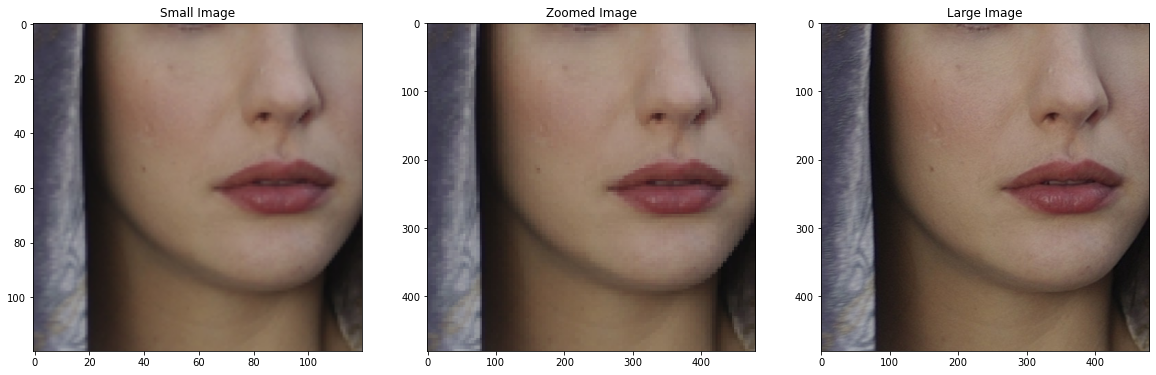

In [9]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im02small.png")
im_large = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im02.png")
assert im is not None

im_znn = nn_zoom(im, 4)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_znn)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[150:270, 150:270], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_znn[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()

In [10]:
ssd = SSD(im_large,im_znn)
print(ssd)

101.43840755208333


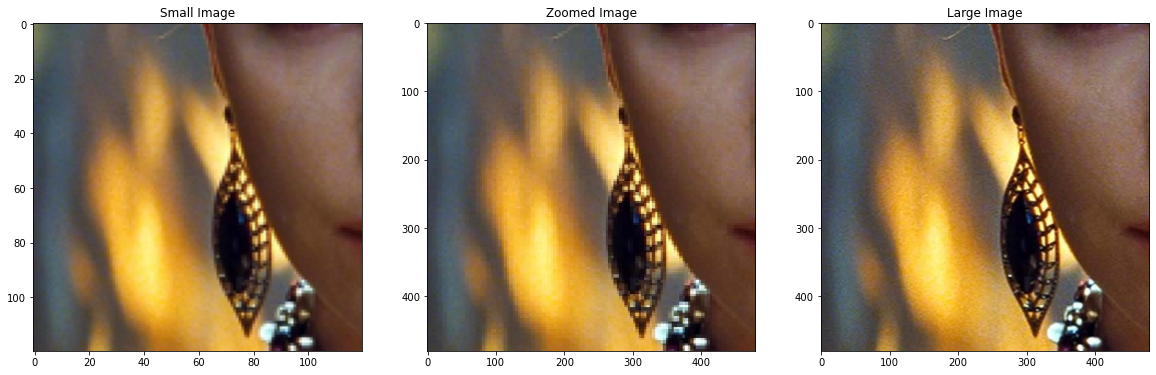

In [11]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im03small.png")
im_large = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im03.png")
assert im is not None

im_znn = nn_zoom(im, 4)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_znn)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[150:270, 150:270], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_znn[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()

(05) - (b)

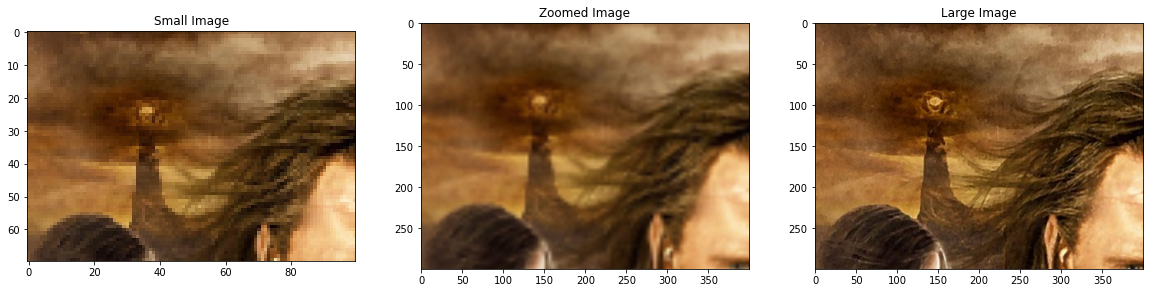

In [12]:
import math

def bl_zoom(Image, new_h, new_w):
    im = Image
    old_h, old_w, c = im.shape
    resized = np.zeros((new_h, new_w, c))
    
    if new_h !=0:
         w_scale_factor = (old_w) / (new_w)
    else:
        w_scale_factor = 0
        
    if new_w != 0:
         h_scale_factor = (old_h) / (new_h)
    else:
         h_scale_factor = 0
    
    for i in range(new_h):
        for j in range(new_w):
            x = i * h_scale_factor
            y = j * w_scale_factor
            
            x_floor = math.floor(x)
            x_ceil = min(old_h - 1, math.ceil(x))
            y_floor = math.floor(y)
            y_ceil = min(old_w - 1, math.ceil(y))
            if (x_ceil == x_floor) and (y_ceil == y_floor):
                q = im[int(x), int(y), :]
                
            elif (x_ceil == x_floor):
                a = im[int(x), int(y_floor), :]
                b = im[int(x), int(y_ceil), :]
                q = a * (y_ceil - y) + b * (y - y_floor)
                
            elif (y_ceil == y_floor):
                a = im[int(x_floor), int(y), :]
                b = im[int(x_ceil), int(y), :]
                q = (a * (x_ceil - x)) + (b * (x - x_floor))
                
            else:
                m = im[x_floor, y_floor, :]
                n = im[x_ceil, y_floor, :]
                p = im[x_floor, y_ceil, :]
                r = im[x_ceil, y_ceil, :]

                a = m * (x_ceil - x) + n * (x - x_floor)
                b = p * (x_ceil - x) + r * (x - x_floor)
                q = a * (y_ceil - y) + b * (y - y_floor) 
           
            resized[i,j,:] = q
            
    return resized.astype(np.uint8)
            
            
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im01small.png")
im_large = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im01.png")
assert im is not None

old_h, old_w, c = im.shape
im_zbl = bl_zoom(im, 4*old_h, 4*old_w)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_zbl)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[0:70, 0:100], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_zbl[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()


In [13]:
def SSD(img1,img2):
    val = (np.sum((img1.astype("float")-img2.astype("float"))**2))/float(img1.shape[0]*img1.shape[1])
    return val

ssd = SSD(im_large,im_zbl)
print(ssd)

600.7354205246913


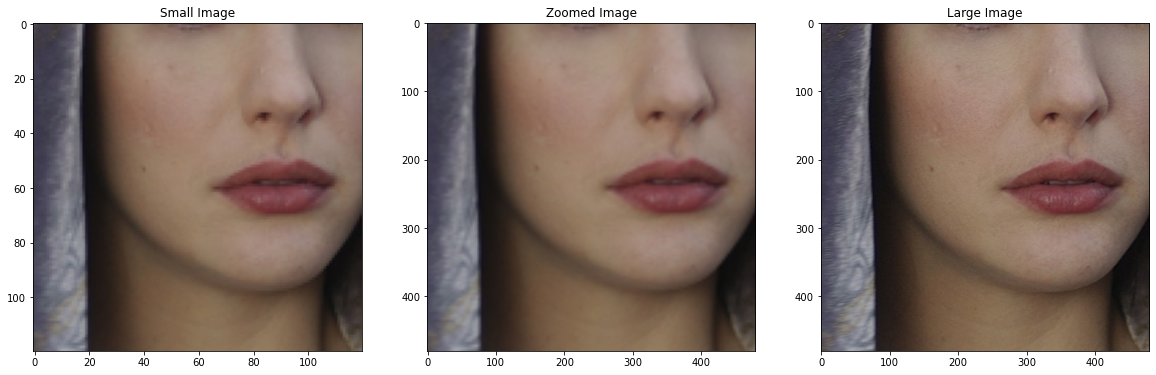

In [14]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im02small.png")
im_large = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im02.png")
assert im is not None

old_h, old_w, c = im.shape
im_zbl = bl_zoom(im, 4*old_h, 4*old_w)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_zbl)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[150:270, 150:270], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_zbl[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()


In [15]:
ssd = SSD(im_large,im_zbl)
print(ssd)

146.88199652777777


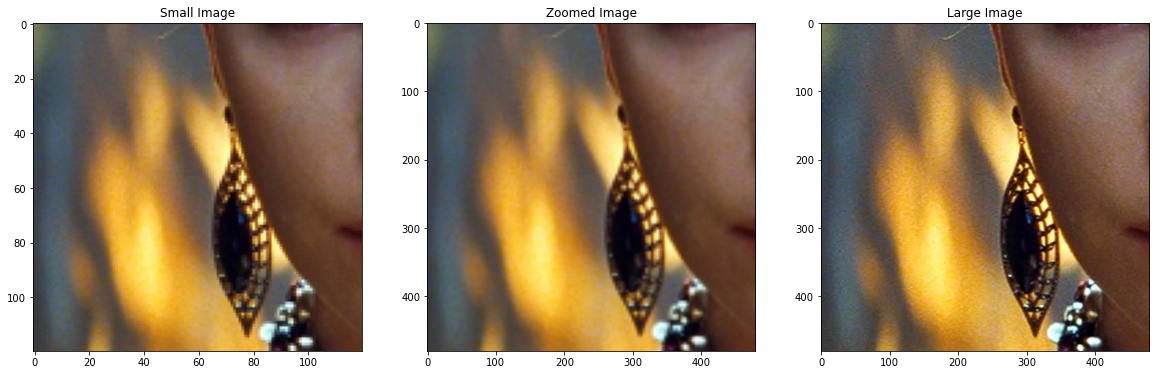

In [16]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im03small.png")
im_large = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\a1q5images\a1q5images\im03.png")
assert im is not None

old_h, old_w, c = im.shape
im_zbl = bl_zoom(im, 4*old_h, 4*old_w)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_zbl)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[150:270, 150:270], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_zbl[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()

(06) - (a)

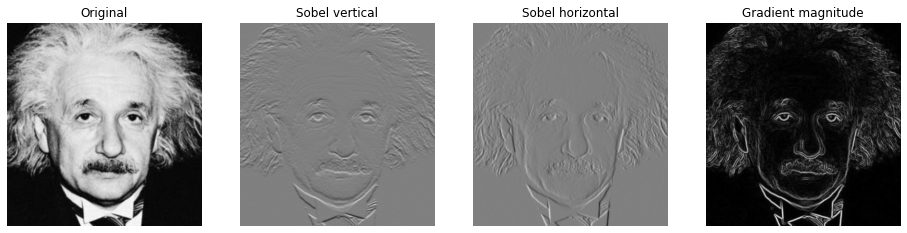

In [17]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v = np.array([[-1 , -2, -1] , [0 ,0 , 0] , [1 , 2, 1] ], dtype=np.float32)
f_x = cv.filter2D(im, -1, sobel_v)

sobel_h = np.array([[-1 , 0, 1] , [-2 ,0 , 2] , [-1 , 0, 1] ], dtype=np.float32)
f_h = cv.filter2D(im, -1, sobel_h)

grad_mag = np.sqrt(f_x**2 + f_h**2)

fig, ax = plt.subplots(1, 4, figsize=(16, 16))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(f_x, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel vertical")
ax[1].axis('off')

ax[2].imshow(f_h, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel horizontal")
ax[2].axis('off')

ax[3].imshow(grad_mag, cmap = 'gray')
ax[3].set_title("Gradient magnitude")
ax[3].axis('off')

plt.show()

(06) - (b)

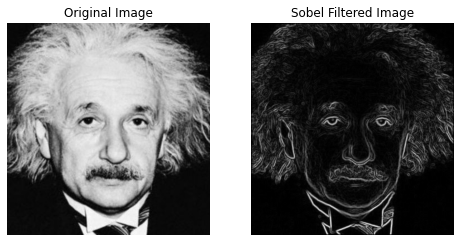

In [18]:
im_g = np.zeros((im.shape[0],im.shape[1]),np.uint8)

for i in range(1,im.shape[0]-1):
    for j in range(1,im.shape[1]-1):
        f_xx = im[i-1, j-1]*(-1) + im[i-1, j]*(-2) + im[i-1, j+1]*(-1) + im[i+1, j-1]*1 + im[i+1, j]*2 + im[i+1, j+1]*1
        f_hh = im[i-1, j-1]*(-1) + im[i, j-1]*(-2) + im[i-1, j+1]*1 + im[i+1, j-1]*(-1) + im[i, j+1]*2 + im[i+1, j+1]*1
        grad = np.sqrt(f_xx**2 + f_hh**2)
        im_g[i, j] = (grad / 1020) * 255
        
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(im_g, cmap = 'gray')
ax[1].set_title("Sobel Filtered Image")
ax[1].axis('off')

plt.show()

(06) - (c)

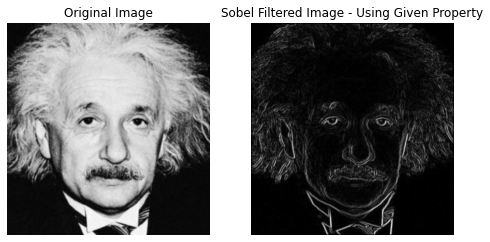

In [19]:
im_gd = np.zeros((im.shape[0],im.shape[1]),np.uint8)

mat = np.multiply((np.array([[1],[2],[1]], dtype=np.int32)),(np.array([1,0,-1], dtype=np.int32)))

sobel_hh = np.array([[0,0,0],[0,0,0],[0,0,0]])
for i in range(len(mat)):
    sobel_hh[i] = mat[i][::-1]

sobel_vv = sobel_hh.T

for i in range(1,im.shape[0]-1):
    for j in range(1,im.shape[1]-1):
        image = np.array([[im[i-1,j-1],im[i,j],im[i+1,j+1]], [im[i,j-1],im[i,j],im[i,j+1]], [im[i+1,j-1],im[i+1,j],im[i+1,j+1]]], dtype=np.float32)
        ##print(image)
        val_xx = 0
        val_yy = 0
        for k in range(3):
            for m in range(3):
                val_xx += image[k][m]*sobel_hh[k][m]
                val_yy += image[k][m]*sobel_vv[k][m]
        ##print(val_xx, val_yy)
        grad = np.sqrt(val_xx**2 + val_yy**2)
        im_gd[i, j] = (grad / 1020) * 255
                
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(im_gd, cmap = 'gray')
ax[1].set_title("Sobel Filtered Image - Using Given Property")
ax[1].axis('off')

plt.show()    

(07) - (a)

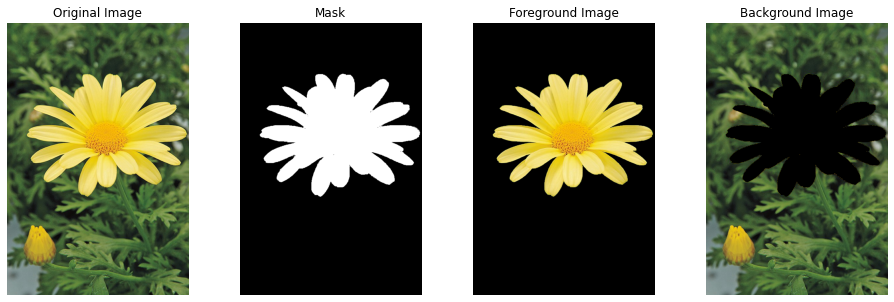

In [20]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\daisy (1).jpg", cv.IMREAD_COLOR)
im_original = im.copy()

mask = np.zeros(im.shape[:2], np.uint8)
rect = (0, 90, 560, 500)
fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)

cv.grabCut(im, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask1 = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
im_fgd = im*mask1[:, :, np.newaxis]
mask2 = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
im_bgd = im*mask2[:, :, np.newaxis]

cv.imshow('Image', im_bgd)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 4, figsize=(16, 5))

ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask1, cmap = "gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im_fgd, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground Image")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(im_bgd, cv.COLOR_BGR2RGB))
ax[3].set_title("Background Image")
ax[3].axis("off")

plt.show()

(07) - (b)

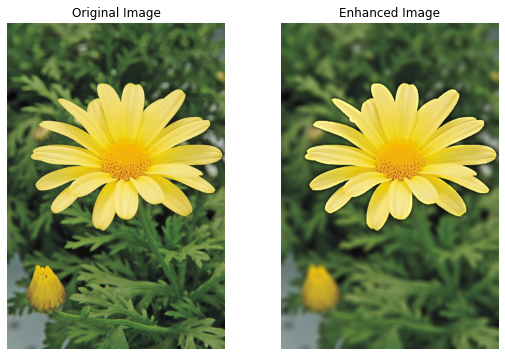

In [21]:
im_blurred = cv.blur(im_bgd, (15, 15))
im_enhanced = cv.add(im_blurred, im_fgd)

fig, ax = plt.subplots(1, 2, figsize=(9, 6))

ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
ax[1].axis("off")

plt.show()

(07) - (c)

For image enhancing with blur background, we are use a kernel (here it is 15 x 15 matrix) of matrix of 1 which is multiplied by 1 over (kernel height*kernel width). Therefore, when we are doing convolution with image and kernel, black area pixels(near dark areas - edges of the flower) get more darker intensities than original image. Therefore, we can see the background just beyond the edge of the flower quite dark in the enhanced image.

kernel = 1/(kernel height x kernel width)  x  [[1, 1, 1, ......1, 1, 1], [1, 1, 1, ......1, 1, 1], ...................[1, 1, 1, ......1, 1, 1]]
